<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


***Case 1:*** Relation between the houses and the nearest to the Charles river.

### Hypotyesis:

Significance=0.05

H_0: the price of houses bouded to the Charles river has not affected by it

H_a: the price of houses bounded to the Charles river has affected by it

In [5]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],
                      boston_df[boston_df['CHAS']==0]['MEDV'],equal_var=True)                     

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

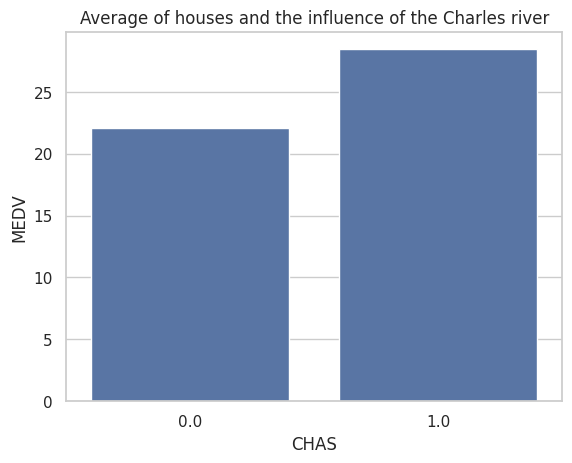

In [6]:
chas_medv=boston_df.groupby('CHAS')[['MEDV']].mean().reset_index()

sns.set(style='whitegrid')
ax=sns.barplot(x='CHAS', y='MEDV', data=chas_medv)
ax.set_title('Average of houses and the influence of the Charles river')

pyplot.show()

***Conclusion:*** how the pvalue is less than 0.05, I conclude to reject the hypothesis null.







***Case 2:*** Relation between the value of houses and age of owner occupants.

### Hypothesis:


Significane = 0.05

H_0: the mean of the three groups are equal

H_a: at least one population mean are different
by it

In [7]:
boston_df.loc[(boston_df['AGE']<=35), 'age_group']='35 years and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70), 'age_group']='between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>70), 'age_group']='70 years and older'

In [8]:
scipy.stats.levene(boston_df[boston_df['age_group']=='35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group']=='70 years and older']['MEDV'], center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [9]:
thirtyfive_lower= boston_df[boston_df['age_group']=='35 years and younger']['MEDV']
thirtyfive_seven= boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV']
seventy_older= boston_df[boston_df['age_group']=='70 years and older']['MEDV']

In [10]:
f_statistic, p_value= scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seven, seventy_older)
print('F-Statistic: {0}, P-Value: {1}'.format(f_statistic, p_value))

F-Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [11]:
lm= ols('MEDV~age_group', data=boston_df).fit()
table=sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


Text(0.5, 1.0, 'Average value of houses and age of owner occupants')

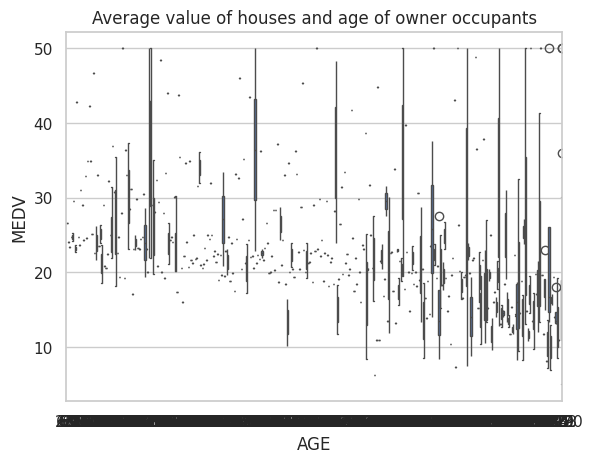

In [12]:
ax=sns.boxplot(x='AGE', y='MEDV', data=boston_df)
ax.set_title('Average value of houses and age of owner occupants')

***Conclusion:*** how the p_value are less than the significance (0.05) I conclude that at least one of the three ranges of ages are different. Looking the plot, I think that the properties of people with more age are cheap than the others.




***Case3:*** analisis of the relationship between Nitric oxide concentration and the proportion of non-retail business accre/town.

### Hypothesis:

Significance = 0.05

H_0: there is no relationship between NOX and INDUS

H_a: there is a relationship between NOX and INDUS



In [13]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Text(0.5, 1.0, 'Relation between Nitric oxide(NOX), and non-retail accres/town(INDUS)')

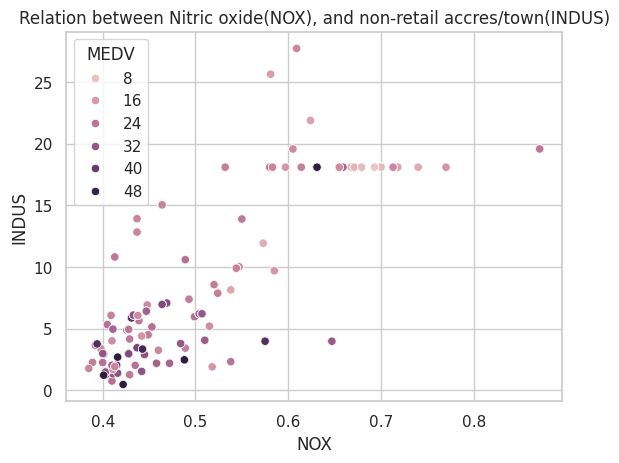

In [14]:
ax=sns.scatterplot(x='NOX', y='INDUS', hue='MEDV', data=boston_df)
ax.set_title('Relation between Nitric oxide(NOX), and non-retail accres/town(INDUS)') 

Text(0.5, 1.0, 'Relation between (NOX), and (INDUS) with curve')

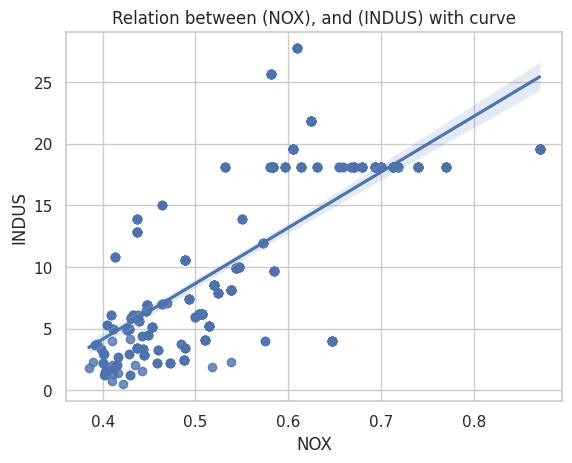

In [16]:
ax=sns.regplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title('Relation between (NOX), and (INDUS) with curve')

***Conclusion:*** because the p-value is less than the significance(0.05), we can reject the hypotesis null, and see that exist a relation NOX and INDUS.

***Case4:*** The impact of an additional weighted distance to the five Boston employement centres and the median value of owner-occupied houses.

### Hypothesis:

Significance = 0.05

H_0: there is no relation in the distance to Boston employement centres and the value of owner-occupied houses

H_a: exist a relationship between the distance to Boston and the value of the houses



In [17]:
X=boston_df['DIS']
Y=boston_df['MEDV']

X=sm.add_constant(X)

model=sm.OLS(Y, X).fit()
predictions=model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        10:29:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Conclusion:*** we can reject the null hypothesis because the p-value are less than 0.05.

## Other informations:

***Boxplot fot the 'Median value of owner-occupied homes' (MEDV)***

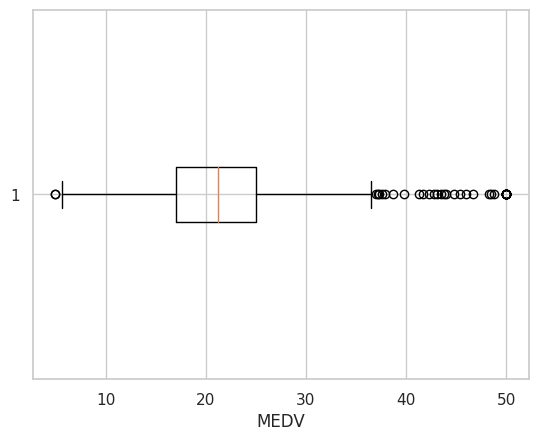

In [22]:
pyplot.boxplot(boston_df['MEDV'], vert=False)
pyplot.xlabel('MEDV')
pyplot.show()

***Conclusion:*** we can see a lot of outliers with a value greater then the median value, that are in all of ages, but more in the population older.

***Histogram for the pupil to teacher ratio variable (PTRATIO)***

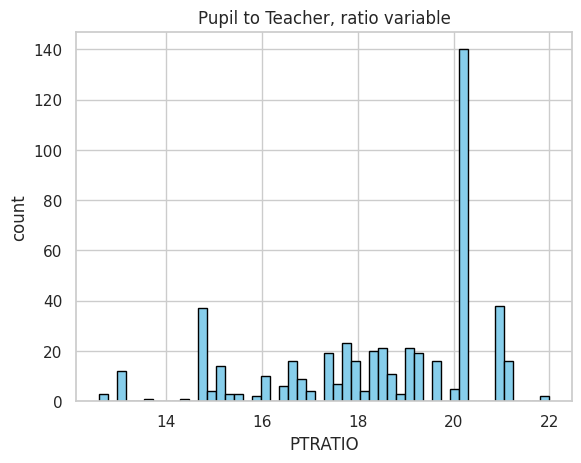

In [55]:
pyplot.hist(boston_df['PTRATIO'], bins=50,  color='skyblue', edgecolor='black')
pyplot.xlabel('PTRATIO')
pyplot.ylabel('count')

pyplot.title('Pupil to Teacher, ratio variable')
pyplot.show()